## Load necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Line graph

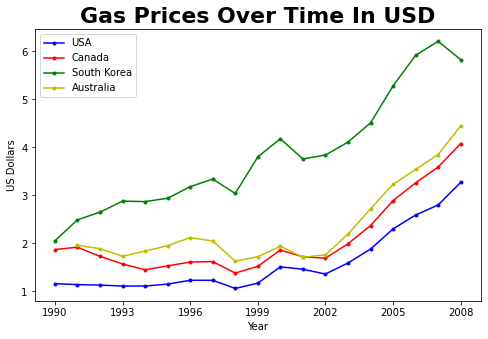

In [40]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))

plt.plot(gas['Year'], gas['USA'], 'b.-', label='USA')
plt.plot(gas['Year'], gas['Canada'], 'r.-', label='Canada')
plt.plot(gas['Year'], gas['South Korea'], 'g.-', label='South Korea')
plt.plot(gas['Year'], gas['Australia'], 'y.-', label='Australia')

plt.title('Gas Prices Over Time In USD', fontdict={'fontweight':'bold', 'fontsize':22})
plt.legend()
plt.xticks(gas['Year'][::3])
plt.xlabel('Year')
plt.ylabel('US Dollars')

plt.savefig('Gas_Price_Figure.png', dpi=300)
plt.show()

## Load fifa data

In [42]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


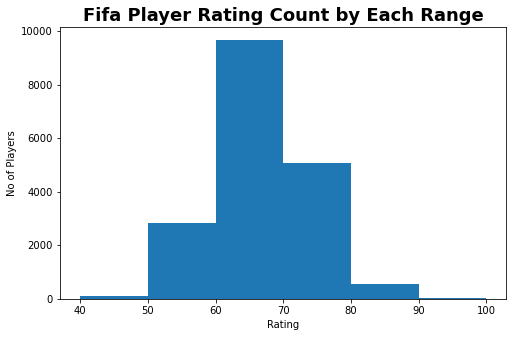

In [59]:
bins = [40,50,60,70,80,90,100]

plt.figure(figsize=(8,5))

plt.hist(fifa['Overall'], bins=bins)
plt.xticks(bins)
plt.xlabel('Rating')
plt.ylabel('No of Players')
plt.title('Fifa Player Rating Count by Each Range', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [61]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

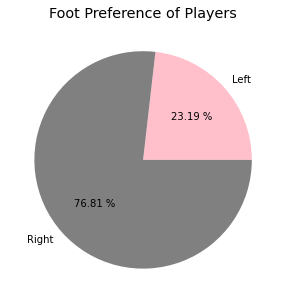

In [103]:
plt.figure(figsize=(8,5))

left = fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot']=='Right'].count()[0]

labels = ['Left','Right']
colors = ['pink','grey']
plt.pie([left,right], labels=labels, colors=colors, autopct='%.2f %%')
plt.title('Foot Preference of Players')

plt.show()

In [91]:
fifa['Weight'] = [int(x.strip('lbs')) if type(x)==str else x for x in fifa['Weight']]
fifa['Weight'][0]

159.0

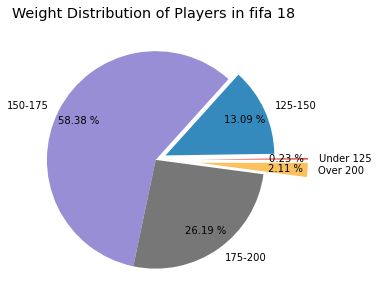

In [112]:
plt.style.use('ggplot')

plt.figure(figsize=(8,5))

light = fifa.loc[fifa['Weight']<125].count()[0]
light_medium = fifa.loc[(fifa['Weight']>125) & (fifa['Weight']<150)].count()[0]
medium = fifa.loc[(fifa['Weight']>150) & (fifa['Weight']<175)].count()[0]
medium_heavy = fifa.loc[(fifa['Weight']>175) & (fifa['Weight']<200)].count()[0]
heavy = fifa.loc[fifa['Weight']>200].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
explode = [.4,.1,0,0,.4]

plt.pie(weights, labels=labels, autopct='%.2f %%', pctdistance=0.8, explode=explode)
plt.title('Weight Distribution of Players in fifa 18 ')

plt.show()

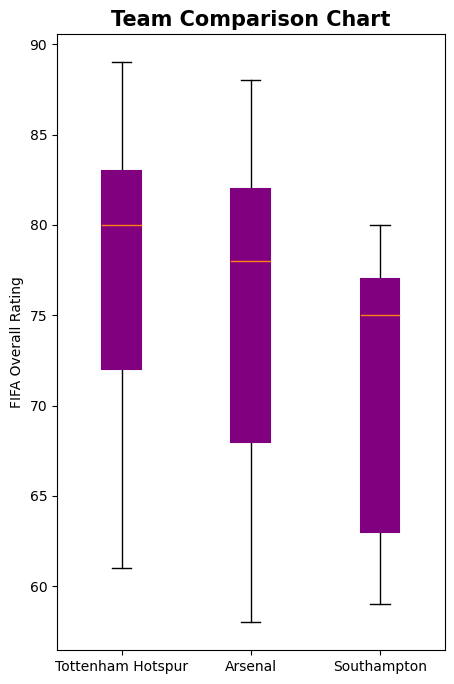

In [151]:
plt.figure(figsize=(5,8))

plt.style.use('default')

tottenham = fifa.loc[fifa['Club']=='Tottenham Hotspur']['Overall']
arsenal = fifa.loc[fifa['Club']=='Arsenal']['Overall']
southampton = fifa.loc[fifa['Club']=='Southampton']['Overall']

labels = ['Tottenham Hotspur','Arsenal', 'Southampton']
boxes = plt.boxplot([tottenham, arsenal, southampton], labels=labels, patch_artist=True)
for box in boxes['boxes']:
    box.set(color='purple', linewidth=1.5)
plt.title('Team Comparison Chart', fontdict={'fontweight':'bold', 'fontsize':15})
plt.ylabel('FIFA Overall Rating')
plt.show()